In [45]:
from numpy import linspace, arange, zeros
from control import c2d, tf
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import control
import control.matlab
from sympy import *
from lcapy import z

### Aluno: Eric Monteiro dos Reis

### Questao 1

In [3]:
T = 0.5
Gs = tf([1,1], [1, 4])
Gz = c2d(Gs, T)
print('Gz = \n', Gz)

Gz = 
 
z - 0.7838
----------
z - 0.1353

dt = 0.5



In [4]:
GHs = tf([2,2],[1,4,0])
GHz = c2d(GHs, T)
print('Hz = \n', GHz)

Hz = 
 
  0.5742 z - 0.3581
----------------------
z^2 - 1.135 z + 0.1353

dt = 0.5



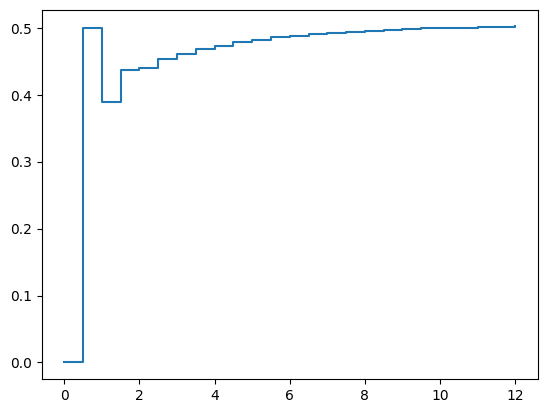

In [5]:
kmax = 25

t = T*arange(0,kmax)
r = T*arange(0,kmax)

c = np.zeros(kmax)
v = np.zeros(kmax)
e = np.zeros(kmax)

k = 1

v[k] = 0.5742*e[k-1] + 1.135*v[k-1] 
e[k] = r[k] - v[k]
c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]

for k in range(2, kmax):
    v[k] = 0.5742*e[k-1] - 0.3581*e[k-2] + 1.135*v[k-1] - 0.1353*v[k-2]
    e[k] = r[k] - v[k]
    c[k] = e[k] - 0.7838*e[k-1] + 0.1353*c[k-1]
    

plt.plot(t,c, ds='steps-post')


### Questao 2

Letra A

In [6]:
T = 0.2

A = tf(1, [1, 2, 0])

Az = c2d(A, T)

print('Az = \n', Az)

control.poles(Az)

Az = 
 
 0.01758 z + 0.01539
---------------------
z^2 - 1.67 z + 0.6703

dt = 0.2



array([1.        +0.j, 0.67032005+0.j])

In [7]:
T = 0.2
zeta = 0.4
wn = 2

z_ang = T*wn*np.sqrt(1-(zeta**2))

print(f'angulo de Z: {z_ang}')

z_mod = np.exp(-T*zeta*wn)
print(f'modulo de Z: {z_mod}')

z_rect = cmath.rect(z_mod, z_ang)
print(f'Z na forma retangular: {z_rect}')



angulo de Z: 0.3666060555964672
modulo de Z: 0.8521437889662113
Z na forma retangular: (0.795518217452992+0.3054501641415585j)


In [8]:
# G2 foi calculado no papel
G2z = tf([0.01758, 0.01539], [1,-1], T)
print(G2z)


0.01758 z + 0.01539
-------------------
       z - 1

dt = 0.2



In [39]:
angle_g1 = np.pi - cmath.phase(G2z(z_rect))
new_angle = angle_g1/2
print(f'angulo em radianos: {angle_g1}')
angle_degrees = math.degrees(angle_g1)
print(f'angulo em graus: {angle_degrees}')

angulo em radianos: 5.121507322083493
angulo em graus: 293.44075430073246


In [40]:
new_angle

2.5607536610417463

In [41]:
beta = (z_rect.imag - (z_rect.real*math.tan(-new_angle)))/math.tan(-new_angle)
print('beta = ', beta)

beta =  -0.33015419183590894


Modificando o beta para calcularmos o erro da questão 2b

In [57]:
beta = 0.25

In [58]:
G1z = tf([1],[1, beta],T)
print(G1z)


   1
--------
z + 0.25

dt = 0.2



In [59]:
G1z = tf([1],[1, beta],T)
print(G1z)


   1
--------
z + 0.25

dt = 0.2



In [60]:
FTMA = G1z * G2z
print(FTMA)


0.01758 z + 0.01539
-------------------
z^2 - 0.75 z - 0.25

dt = 0.2



In [15]:
Kc = 1/np.abs(FTMA(z_rect))
print(Kc)

6.851955251667097


Letra B

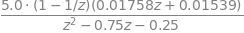

In [63]:
z = Symbol('z')
f = (((0.01758*z + 0.01539) /(z**2 - 0.75*z - 0.25)) * (1 - z**-1))/T
f

In [65]:
limit(f,z,1)

In [67]:
kv = 3297/25000

Como queremos calcular o valor do Kc para um erro de regime permanente de 2, teremos ess = 1/(kv*kc) -> 2 = 1/(0.13188*kc)

In [69]:
kc = 1/(2*kv)
print(kc)

3.791325447376403
